In [29]:
# import necessary packages

import os

import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os
import glob
import cv2
import numpy as np
#from skimage import data, io, filters
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D
from PIL import Image, ImageEnhance
#from keras.utils import np_utils

import keras
import tensorflow

#from keras import ops
from keras import layers

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5


  Using cached keras-3.0.5-py3-none-any.whl (1.0 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

imagePaths = list(paths.list_images("/content/drive/MyDrive/data"))
print(imagePaths)

['/content/drive/MyDrive/data/Normal/dysgraphia_467_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_990_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1358_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_858_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_754_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_821_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_850_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1356_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_803_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1337_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1029_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_859_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_844_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_927_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_984_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1014_no.jpg', '/content/drive/MyDrive/data/Norma

In [4]:
print(os.path.split(imagePaths[0])[1].split('_')[-1].split('.')[0])

no


In [5]:
#To read and preprocess image data
data = []
lables = []
c = 0 ## to see the progress
for image in imagePaths:

    lable = os.path.split(image)[1].split('_')[-1].split('.')[0]
  
    img=Image.open(image)
    # img = cv2.imread(image)
    img=img.resize((1024,1024))
    enhancer = ImageEnhance.Sharpness(img.convert('RGB'))
    img=enhancer.enhance(20)
   
    img=np.array(img)
    height, width, channels = img.shape
# Number of pieces Horizontally
    W_SIZE  = 2
    # Number of pieces Vertically to each Horizontal
    H_SIZE = 2

    for ih in range(H_SIZE ):
      for iw in range(W_SIZE ):

          x = width/W_SIZE * iw
          y = height/H_SIZE * ih
          h = (height / H_SIZE)
          w = (width / W_SIZE )
          #print(x,y,h,w)
          data.append(img[int(y):int(y+h), int(x):int(x+w)])
          lables.append(lable)

         
    c=c+1
    print(c)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206


In [6]:
# encode the labels as integer
data = np.array(data)
print(data.shape)
lables = np.array(lables)

(824, 512, 512, 3)


In [7]:
print(set(lables))

{'yes', 'no'}


In [8]:
le = LabelEncoder()
lables = le.fit_transform(lables)

myset = set(lables)
print(myset)

{0, 1}


In [9]:

#Splitting of dataset into training and test dataset
(trainX, testX, trainY, testY ) = train_test_split(data, lables, test_size= 0.10, shuffle = True, random_state=42,stratify=lables)
#Evaluate the model

trainY=trainY.reshape(len(trainY),1)
testY=testY.reshape(len(testY),1)
# valY=valY.reshape(len(valY),1)
print("X_train shape", trainX.shape)
print("y_train shape", trainY.shape)
print("X_test shape", testX.shape)
print("y_test shape", testY.shape)


X_train shape (741, 512, 512, 3)
y_train shape (741, 1)
X_test shape (83, 512, 512, 3)
y_test shape (83, 1)


In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label = preprocessing.LabelEncoder()
trainY= label.fit_transform(trainY)
testY= label.fit_transform(testY)
# valY= label.fit_transform(valY)
# print(valY)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


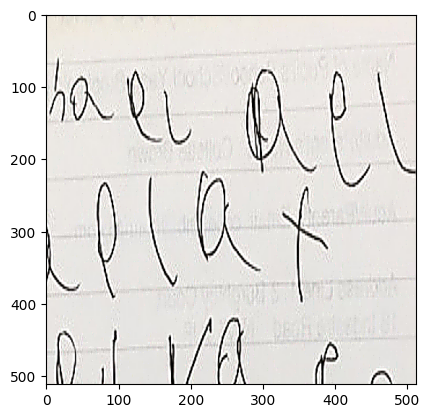

In [11]:
plt.imshow(trainX[126,:])

In [12]:
num_classes = 2
input_shape = (512, 512, 3)
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 20 # For real training, use num_epochs=100. 10 is a test value
image_size = 512 # We'll resize input images to this size
patch_size = 32  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 128
num_heads = 8
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [
    4096,
    2048,
    1024,
]

In [16]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
       # layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        #layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(trainX)

In [17]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [34]:
class Patches(layers.Layer):
    """Create a a set of image patches from input. The patches all have
    a size of patch_size * patch_size.
    """

    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tensorflow.shape(images)[0]
        patches = tensorflow.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tensorflow.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [37]:
class PatchEncoder(layers.Layer):
    """The `PatchEncoder` layer will linearly transform a patch by projecting it into a
    vector of size `projection_dim`. In addition, it adds a learnable position
    embedding to the projected vector.
    """

    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tensorflow.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded
    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config

In [35]:
def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [38]:
model=create_vit_classifier()

In [39]:
optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

In [41]:
history = model.fit(
        x=trainX,
        y=trainY,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,

    )

Epoch 1/20


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7ce923bf3c70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7ce923bf3c70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method _BaseOptimizer._update_step_xla of <tensorflow.python.eager.polymorphic_function.tf_method_target.TfMethodTarget object at 0x7ce853a6b190>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method _BaseOptimizer._update_step_xla of <tensorflow.python.eager.polymorphic_function.tf_method_target.TfMethodTarget object at 0x7ce853a6b190>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
21/21 [==============================] - ETA: 0s - loss: 18.1452 - accuracy: 0.6667 - top-5-accuracy: 1.0000

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7ce8530aa710>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7ce8530aa710>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
21/21 [==============================] - 39s 463ms/step - loss: 18.1452 - accuracy: 0.6667 - top-5-accuracy: 1.0000 - val_loss: 2.5436 - val_accuracy: 0.8267 - val_top-5-accuracy: 1.0000
Epoch 2/20
21/21 [==============================] - 7s 353ms/step - loss: 5.5213 - accuracy: 0.7733 - top-5-accuracy: 1.0000 - val_loss: 3.9161 - val_accuracy: 0.8400 - val_top-5-accuracy: 1.0000
Epoch 3/20
21/21 [==============================] - 7s 357ms/

In [42]:
trainY[1]

0

In [43]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score


In [44]:

acc = history.history['accuracy']
# val_acc = history_VGG.history['val_accuracy']

loss = history.history['loss']
# val_loss = history_VGG.history['val_loss']

In [45]:
print(acc,loss)

[0.6666666865348816, 0.7732732892036438, 0.8123123049736023, 0.8078078031539917, 0.8138138055801392, 0.8333333134651184, 0.8738738894462585, 0.8528528809547424, 0.8708708882331848, 0.8858858942985535, 0.8933933973312378, 0.9144144058227539, 0.9009009003639221, 0.8978978991508484, 0.9234234094619751, 0.869369387626648, 0.902402400970459, 0.8993993997573853, 0.9144144058227539, 0.9309309124946594] [18.14519691467285, 5.521282196044922, 3.148829460144043, 1.623392939567566, 1.53348970413208, 0.9180830121040344, 0.43261590600013733, 0.4902486801147461, 0.3792925477027893, 0.36865755915641785, 0.2676958739757538, 0.2711423933506012, 0.3439345955848694, 0.2527899742126465, 0.24932362139225006, 0.3632413148880005, 0.22945024073123932, 0.2580011188983917, 0.20530620217323303, 0.16159512102603912]


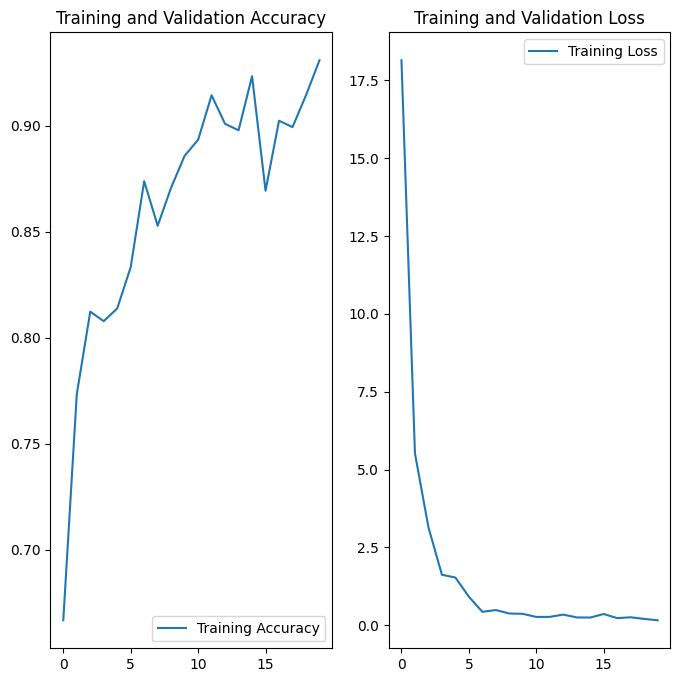

In [46]:
EPOCHS=20
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
# plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
# plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
scores = model.evaluate(testX, testY)
print("\nLoss: %.2f%%" % (scores[1]*100))

3/3 [==============================] - 0s 98ms/step - loss: 0.5081 - accuracy: 0.8916 - top-5-accuracy: 1.0000

Loss: 89.16%


In [56]:
print(testY)

[0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1
 1 0 0 1 1 1 0 1 0]


In [59]:
prediction = model.predict(testX)
predictions=[]
for i in range (0,len(prediction)):
  predictions.append(np.argmax(prediction[i]))
print(predictions)

3/3 [==============================] - 0s 101ms/step
[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0]


3/3 [==============================] - 0s 97ms/step
Accuracy: 0.891566265060241
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        44
           1       0.86      0.92      0.89        39

    accuracy                           0.89        83
   macro avg       0.89      0.89      0.89        83
weighted avg       0.89      0.89      0.89        83

0.9230769230769231
0.8636363636363636


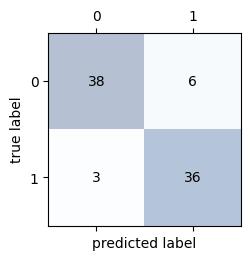

<Axes: >

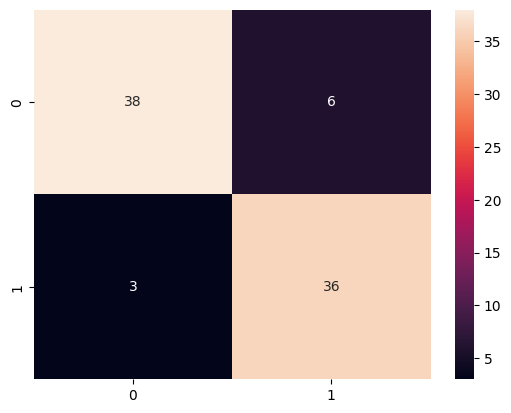

In [60]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
prediction = model.predict(testX)
predictions=[]
for i in range (0,len(prediction)):
  predictions.append(np.argmax(prediction[i]))
#print(predictions)
from sklearn.metrics import classification_report
print("Accuracy:",metrics.accuracy_score(testY, predictions))
print(classification_report(testY, predictions))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=testY, y_pred=predictions)
sensitivity = recall_score(testY, predictions)
print(sensitivity)
specificity=confmat[0][0]/ (confmat[0][0] + confmat[0][1])
print(specificity)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
     ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
import seaborn as sns
sns.heatmap(confmat, annot=True)

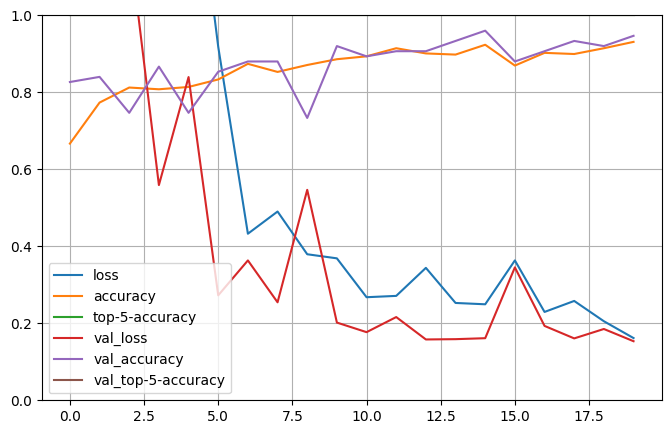

In [61]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [63]:
scores = model.evaluate(testX, testY)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

3/3 [==============================] - 0s 110ms/step - loss: 0.5081 - accuracy: 0.8916 - top-5-accuracy: 1.0000

Accuracy: 89.16%


In [65]:
from sklearn.metrics import roc_curve
prediction = model.predict(testX)
predictions=[]
for i in range (0,len(prediction)):
  predictions.append(np.argmax(prediction[i]))
fpr_keras, tpr_keras, thresholds_keras = roc_curve(testY, predictions)

3/3 [==============================] - 0s 112ms/step


In [66]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

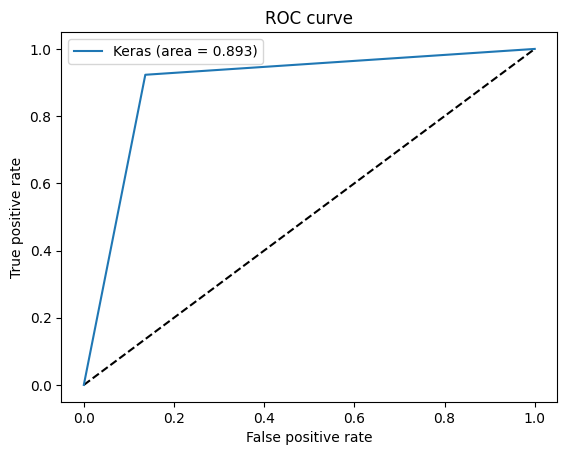

In [67]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
import pickle

pickle.dump(model,open('imagenet_19.pkl','wb'))